In [193]:
%matplotlib inline
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('lesson_3_data.csv', encoding='windows-1251')

In [16]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [18]:
user_df = df[['tc','art_sp']]

In [20]:
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [22]:
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})

In [24]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [26]:
 brand_name = 'MARAVILLA 500 G Store_Brand'

In [28]:
brand_name.split(' ')[-1]

'Store_Brand'

In [30]:
 user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48129 entries, 0 to 48128
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     48129 non-null  int64 
 1   brand_info  48129 non-null  object
dtypes: int64(1), object(1)
memory usage: 752.1+ KB


In [32]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [34]:
user_df['brand_name'] = user_df['brand_info'].apply(split_brand)

In [36]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [56]:
users_purcheses = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name' : 'count'}) \
    .rename(columns={'brand_name':'purchases'}) \
    .query('purchases >= 5')

In [58]:
users_purcheses.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [60]:
# Посчитаем медиану покупок
users_purcheses.purchases.median()

7.0

In [62]:
users_purcheses.describe()
# 50-75 (и так далее) -- это процентили (относительное положение определённого значения в наборе данных)

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [68]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name':'unique_brands'})

In [76]:
users_unique_brands.head(5)

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [ ]:
# Что же такое pandas.Series?

In [ ]:
# Рассмотрим список 
x = [1, 2, 3]
# Для анализа список не очень подходит

In [85]:
# Поэтому в Pandas существует собственный список
x = pd.Series([1, 2, 3])
x

0    1
1    2
2    3
dtype: int64

In [93]:
x.median()    # и другие методы можно использовать с Series

2.0

In [ ]:
# Анлогично со словарями: для них аналагом является DataFrame

In [95]:
# Обычный словарь
d = {'x':'[1, 2 ,3]', 'y':'[4, 5, 6]'}
d

{'x': '[1, 2 ,3]', 'y': '[4, 5, 6]'}

In [104]:
# И использование Pandas DataFrame:
d = pd.DataFrame({'x':[1, 2 ,3], 'y':['a','b', 'c']})
d

,x,y
0,1,a
1,2,b
2,3,c


In [ ]:
# Найдем для каждого пользователя бренд, который чаще всего покупает 

In [136]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'})

In [138]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [110]:
# Если мы не знаем о методе, то можно использовать следующее:
# ??pd.DataFrame.merge 

In [ ]:
# Объединим таблицы

In [144]:
loyalty_df = users_purcheses \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

# inner использует по умолчанию

In [146]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [156]:
loyal_user = loyalty_df[loyalty_df.unique_brands == 1]

In [158]:
loyal_user

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [ ]:
# Метрика "Лояльность пользователя"

In [160]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [162]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


In [ ]:
# Графики

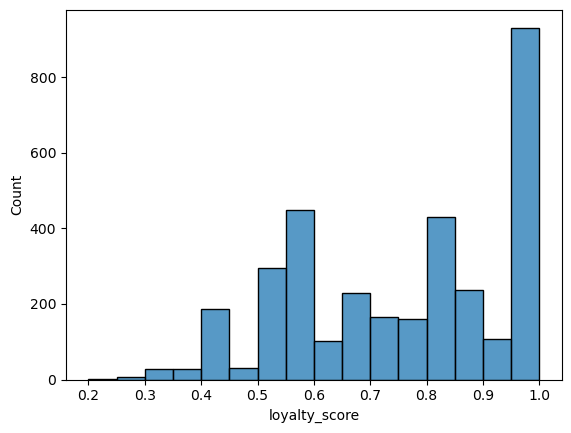

In [209]:
ax = sns.histplot(loyalty_df.loyalty_score, kde=False)
plt.show()

In [223]:
brands_loalty = loyalty_df.groupby('lovely_brand') \
    .agg({'loyalty_score':'median', 'user_id':'count'})



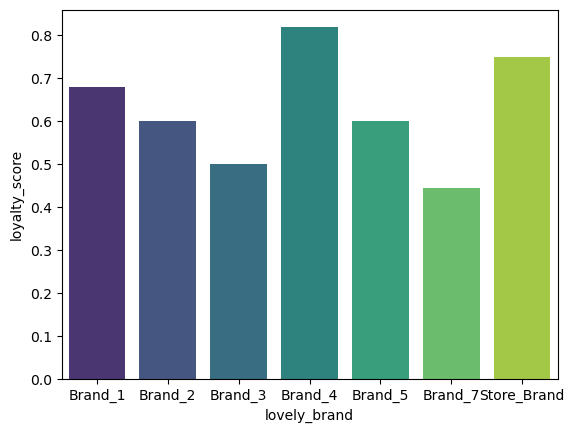

In [231]:
ax = sns.barplot(x='lovely_brand', y='loyalty_score', data=brands_loalty, hue='lovely_brand', palette='viridis', legend=False)
plt.show()